<a href="https://colab.research.google.com/github/Shirisha111/ML/blob/master/Patient_Survival_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [3]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [4]:
pharma_data["Treated_with_drugs"].fillna(pharma_data["Treated_with_drugs"].mode().values[0], inplace = True)
pharma_data["A"].fillna(pharma_data["A"].mode().values[0], inplace=True)
pharma_data["B"].fillna(pharma_data["B"].mode().values[0], inplace=True)
pharma_data["C"].fillna(pharma_data["C"].mode().values[0], inplace=True)
pharma_data["D"].fillna(pharma_data["D"].mode().values[0], inplace=True)
pharma_data["E"].fillna(pharma_data["E"].mode().values[0], inplace=True)
pharma_data["F"].fillna(pharma_data["F"].mode().values[0], inplace=True)
pharma_data["Z"].fillna(pharma_data["Z"].mode().values[0], inplace=True)
pharma_data["Number_of_prev_cond"].fillna(pharma_data["Number_of_prev_cond"].mode().values[0], inplace=True)


pharma_data.isnull().sum()


ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [5]:
df = pd.get_dummies(pharma_data)
#pd.options.display.float_format = "{:,.2f}".format
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,Treated_with_drugs_DX1,Treated_with_drugs_DX1 DX2,Treated_with_drugs_DX1 DX2 DX3,Treated_with_drugs_DX1 DX2 DX3 DX4,Treated_with_drugs_DX1 DX2 DX3 DX4 DX5,Treated_with_drugs_DX1 DX2 DX3 DX5,Treated_with_drugs_DX1 DX2 DX4,Treated_with_drugs_DX1 DX2 DX4 DX5,Treated_with_drugs_DX1 DX2 DX5,Treated_with_drugs_DX1 DX3,Treated_with_drugs_DX1 DX3 DX4,Treated_with_drugs_DX1 DX3 DX4 DX5,Treated_with_drugs_DX1 DX3 DX5,Treated_with_drugs_DX1 DX4,Treated_with_drugs_DX1 DX4 DX5,Treated_with_drugs_DX1 DX5,Treated_with_drugs_DX2,Treated_with_drugs_DX2 DX3,Treated_with_drugs_DX2 DX3 DX4,Treated_with_drugs_DX2 DX3 DX4 DX5,Treated_with_drugs_DX2 DX3 DX5,Treated_with_drugs_DX2 DX4,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_Cannot say,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
0,22374,8,3333,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1
1,18164,5,5740,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
2,6283,23,10446,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1
3,5339,51,12011,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,33012,0,12513,128,1.348400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1


In [6]:
df.isnull().sum()

ID_Patient_Care_Situation                  0
Diagnosed_Condition                        0
Patient_ID                                 0
Patient_Age                                0
Patient_Body_Mass_Index                    0
A                                          0
B                                          0
C                                          0
D                                          0
E                                          0
F                                          0
Z                                          0
Number_of_prev_cond                        0
Survived_1_year                            0
Treated_with_drugs_DX1                     0
Treated_with_drugs_DX1 DX2                 0
Treated_with_drugs_DX1 DX2 DX3             0
Treated_with_drugs_DX1 DX2 DX3 DX4         0
Treated_with_drugs_DX1 DX2 DX3 DX4 DX5     0
Treated_with_drugs_DX1 DX2 DX3 DX5         0
Treated_with_drugs_DX1 DX2 DX4             0
Treated_with_drugs_DX1 DX2 DX4 DX5         0
Treated_wi

In [7]:
X = df.drop(["Survived_1_year"],axis =1)
y = df["Survived_1_year"]
X.sort_index(axis=1, inplace=True)
X.head()

,A,B,C,D,Diagnosed_Condition,E,F,ID_Patient_Care_Situation,Number_of_prev_cond,Patient_Age,Patient_Body_Mass_Index,Patient_ID,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_Smoker_Cannot say,Patient_Smoker_NO,Patient_Smoker_YES,Patient_mental_condition_Stable,Treated_with_drugs_DX1,Treated_with_drugs_DX1 DX2,Treated_with_drugs_DX1 DX2 DX3,Treated_with_drugs_DX1 DX2 DX3 DX4,Treated_with_drugs_DX1 DX2 DX3 DX4 DX5,Treated_with_drugs_DX1 DX2 DX3 DX5,Treated_with_drugs_DX1 DX2 DX4,Treated_with_drugs_DX1 DX2 DX4 DX5,Treated_with_drugs_DX1 DX2 DX5,Treated_with_drugs_DX1 DX3,Treated_with_drugs_DX1 DX3 DX4,Treated_with_drugs_DX1 DX3 DX4 DX5,Treated_with_drugs_DX1 DX3 DX5,Treated_with_drugs_DX1 DX4,Treated_with_drugs_DX1 DX4 DX5,Treated_with_drugs_DX1 DX5,Treated_with_drugs_DX2,Treated_with_drugs_DX2 DX3,Treated_with_drugs_DX2 DX3 DX4,Treated_with_drugs_DX2 DX3 DX4 DX5,Treated_with_drugs_DX2 DX3 DX5,Treated_with_drugs_DX2 DX4,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Z
0,1.0,0.0,0.0,0.0,8,1.0,0.0,22374,2.0,56,18.479385,3333,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0
1,1.0,0.0,0.0,0.0,5,0.0,0.0,18164,1.0,36,22.945566,5740,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,1.0,0.0,0.0,0.0,23,0.0,0.0,6283,1.0,48,27.510027,10446,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0
3,1.0,0.0,0.0,0.0,51,0.0,0.0,5339,1.0,5,19.130976,12011,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,0.0,0.0,0.0,0.0,0,0.0,0.0,33012,1.0,128,1.348400,12513,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =42)

In [9]:
#XGboost
!pip install xgboost

Feature Importances :  [0.03997977 0.02182678 0.09500664 0.04670253 0.06947307 0.00096196
 0.         0.00354086 0.02618411 0.05803567 0.08004966 0.00442011
 0.05171491 0.         0.         0.10827383 0.07403535 0.
 0.03460711 0.01873526 0.00951371 0.         0.         0.
 0.         0.         0.         0.00636889 0.         0.
 0.00693903 0.         0.         0.01252308 0.00881767 0.
 0.         0.         0.         0.         0.         0.0082693
 0.0148081  0.         0.0035     0.00970964 0.02838007 0.00613399
 0.01860903 0.13287984 0.        ]


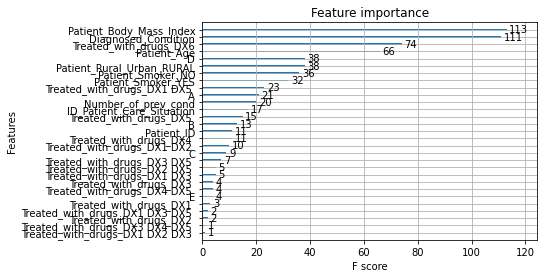

In [10]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBClassifier(random_state = 47 )
xgb_model.fit(X_train, y_train)
print("Feature Importances : ", xgb_model.feature_importances_)


plot_importance(xgb_model)
plt.show()

In [11]:
from sklearn.feature_selection import SelectFromModel

selection = SelectFromModel(xgb_model)
selection.fit(X_train, y_train)

# Transform the train and test features
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test) 

# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [12]:
from sklearn.metrics import f1_score,classification_report

y_pred = xgb_model.predict(X_test)

print(classification_report(y_test ,y_pred))




              precision    recall  f1-score   support

           0       0.81      0.69      0.75      2568
           1       0.83      0.91      0.87      4362

    accuracy                           0.83      6930
   macro avg       0.82      0.80      0.81      6930
weighted avg       0.83      0.83      0.82      6930



In [13]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [14]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
test_data = pd.get_dummies(test_new)


In [16]:
# When compared for the diff between the column names of train and test datasets, this column name was the diff, so added 
test_data["Patient_Smoker_Cannot say"] =0 
test_data.sort_index(axis=1, inplace=True)
test_data.head()

,A,B,C,D,Diagnosed_Condition,E,F,ID_Patient_Care_Situation,Number_of_prev_cond,Patient_Age,Patient_Body_Mass_Index,Patient_ID,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_Smoker_Cannot say,Patient_Smoker_NO,Patient_Smoker_YES,Patient_mental_condition_Stable,Treated_with_drugs_DX1,Treated_with_drugs_DX1 DX2,Treated_with_drugs_DX1 DX2 DX3,Treated_with_drugs_DX1 DX2 DX3 DX4,Treated_with_drugs_DX1 DX2 DX3 DX4 DX5,Treated_with_drugs_DX1 DX2 DX3 DX5,Treated_with_drugs_DX1 DX2 DX4,Treated_with_drugs_DX1 DX2 DX4 DX5,Treated_with_drugs_DX1 DX2 DX5,Treated_with_drugs_DX1 DX3,Treated_with_drugs_DX1 DX3 DX4,Treated_with_drugs_DX1 DX3 DX4 DX5,Treated_with_drugs_DX1 DX3 DX5,Treated_with_drugs_DX1 DX4,Treated_with_drugs_DX1 DX4 DX5,Treated_with_drugs_DX1 DX5,Treated_with_drugs_DX2,Treated_with_drugs_DX2 DX3,Treated_with_drugs_DX2 DX3 DX4,Treated_with_drugs_DX2 DX3 DX4 DX5,Treated_with_drugs_DX2 DX3 DX5,Treated_with_drugs_DX2 DX4,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Z
0,1.0,0.0,0.0,0.0,40,1.0,0.0,19150,2.0,16,29.443894,3709,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0
1,1.0,1.0,0.0,0.0,52,0.0,0.0,23216,2.0,24,26.836321,986,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0
2,1.0,0.0,0.0,0.0,50,1.0,0.0,11890,2.0,63,25.523280,11821,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0
3,1.0,0.0,1.0,0.0,32,1.0,0.0,7149,3.0,42,27.171155,3292,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0
4,1.0,0.0,0.0,0.0,20,0.0,0.0,22845,1.0,50,25.556192,9959,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0


In [17]:
test_data.isnull().sum()

A                                          0
B                                          0
C                                          0
D                                          0
Diagnosed_Condition                        0
E                                          0
F                                          0
ID_Patient_Care_Situation                  0
Number_of_prev_cond                        0
Patient_Age                                0
Patient_Body_Mass_Index                    0
Patient_ID                                 0
Patient_Rural_Urban_RURAL                  0
Patient_Rural_Urban_URBAN                  0
Patient_Smoker_Cannot say                  0
Patient_Smoker_NO                          0
Patient_Smoker_YES                         0
Patient_mental_condition_Stable            0
Treated_with_drugs_DX1                     0
Treated_with_drugs_DX1 DX2                 0
Treated_with_drugs_DX1 DX2 DX3             0
Treated_with_drugs_DX1 DX2 DX3 DX4         0
Treated_wi

In [20]:
# Finding the differences between both the column names
train_cols = X_train.columns
test_cols = test_data.columns

common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)
print(train_not_test)

Index([], dtype='object')


In [28]:
pred = xgb_model.predict(test_data)


In [23]:
pred


array([1, 1, 1, ..., 1, 0, 0])

In [31]:

# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(pred)
res.index = test_new.index # its important for comparison
res.columns = ["pred"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results_HP.csv')         
files.download('prediction_results_HP.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>